In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import env
import wrangle


# Exercises 1 - Telco

In [2]:
df = wrangle.get_telco_data()

Reading from local CSV...


In [3]:
df = wrangle.prep_telco_1(df)

#### 1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [4]:
train, test, validate = wrangle.train_test_validate_split(df)

train	 n = 3937
test	 n = 1407
validate n = 1688


In [5]:
target = 'total_charges'

#### 2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.


In [7]:
import itertools
def plot_variable_pairs3(train):
    quant_features = [col for col in df.columns if df[col].dtype != object]
    feature_combos = []
    feature_combos.extend(list(itertools.combinations(quant_features, 2)))
    feature_combos = [list(combo) for combo in feature_combos]
    for combo in feature_combos:
        sns.lmplot(x=combo[0], y=combo[1], data=train, line_kws={'color': 'red'})
        plt.show()

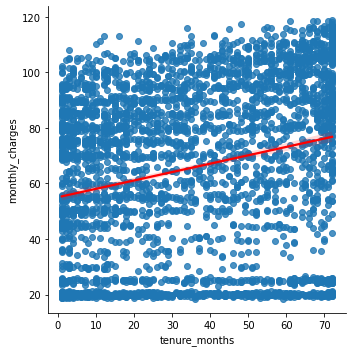

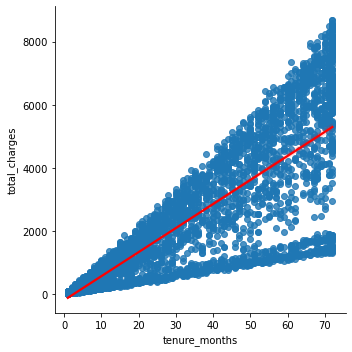

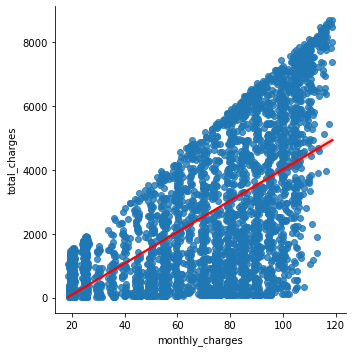

In [8]:
plot_variable_pairs3(train)

In [9]:
def plot_variable_pairs2(train):
    quant_features = [col for col in df.columns if df[col].dtype != object]
    for feature1 in quant_features:
        for feature2 in quant_features:
            if feature1 != feature2:
                sns.lmplot(x=feature1, y=feature2, data=train, line_kws={'color': 'red'})
                plt.show()

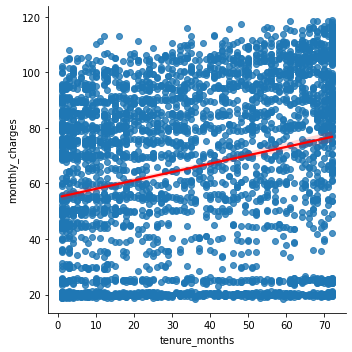

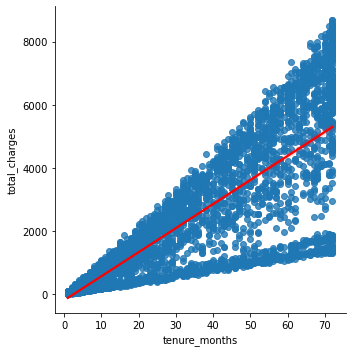

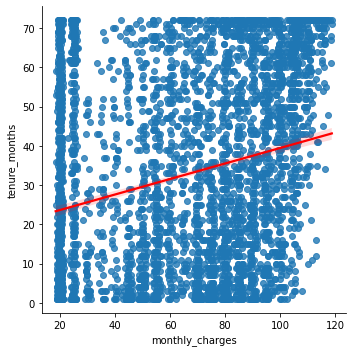

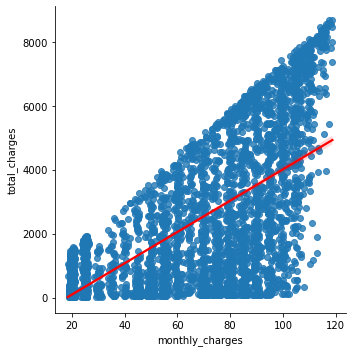

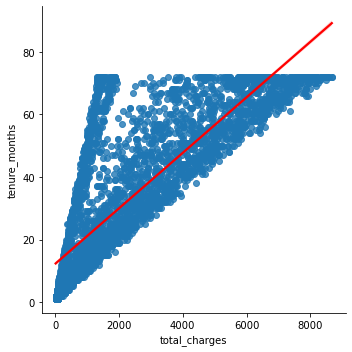

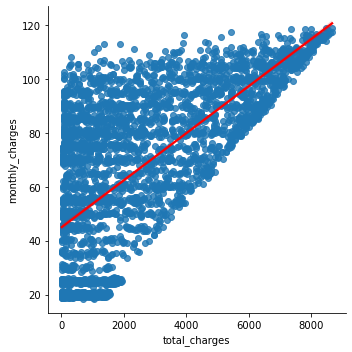

In [10]:
plot_variable_pairs2(train)

In [12]:
def plot_variable_pairs(train):
    quant_features = [col for col in df.columns if df[col].dtype != object and col != target]
    for feature in quant_features:
        sns.lmplot(x=feature, y=target, data=train, line_kws={'color': 'red'})
        plt.show()

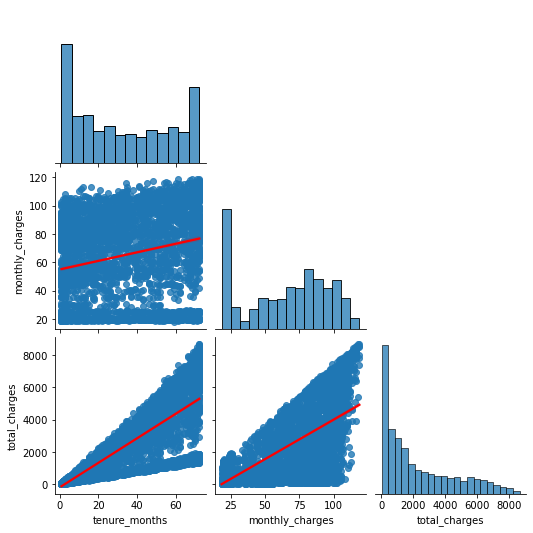

In [13]:
sns.pairplot(train, corner=True, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

#### 3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.


In [14]:
def months_to_years(df):
    df['tenure_years'] = df.tenure_months // 12
    return df



#### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.


In [21]:
quant_features = [col for col in df.columns if df[col].dtype != object and col != target]
quant_features

['tenure_months', 'monthly_charges', 'tenure_years']